In [1]:
#!pip install pygame

In [2]:
import os
import sys
sys.path.append('/content/drive/MyDrive/Noli')
from Environment import Environment
from Council import TheCouncil

import random
import matplotlib.pyplot as plt
import pygame
import numpy as np

#os.environ["SDL_VIDEODRIVER"] = "dummy"                  #  for pygamee window

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
reward_type = 1 #[1, 0, -1]


load = False ### Load existing models or start fresh.

In [4]:
env = Environment()

the_council = TheCouncil()

if the_council.check_for_checkpoints():
    the_council.load_models(load)

def convert_index(index):
    value = index % 6
    x = (index // 6) % 10
    y = (index // 6) // 10
    return [value, x, y]

/home/noli/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import cv2
#from google.colab.patches import cv2_imshow
#from google.colab import output
import time
import torch

width = 1000
height = 1000

FPS = 20


#pygame.init()
#DISP = pygame.display.set_mode((width, height))
clock = pygame.time.Clock( )

Sample = np.zeros((width, height), dtype = np.uint32)
#Output = np.zeros_like(Sample)

# byte packing function
def Pack4bytes(c1,c2,c3,c4) :
    result = c1 << 24 | c2 << 16 | c3 << 8 | c4
    return result

#Initialise color channels
A = np.zeros_like(Sample)
R = np.zeros_like(Sample)
G = np.zeros_like(Sample)
B = np.zeros_like(Sample)

def pygameStep(screen):
          pygame.display.flip()
          screen.fill((0,0,0))
          #convert image so it can be displayed in OpenCV
          view = pygame.surfarray.array3d(screen)
            
          #  convert from (width, height, channel) to (height, width, channel)
          view = view.transpose([1, 0, 2])

          #  convert from rgb to bgr
          img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

          #Display image, clear cell every 0.5 seconds
          #cv2.imshow(view, img_bgr)
          time.sleep(1)
          #utput.clear()
          #

def Render(reward):


    if type(land_tensors) == type(torch.tensor(1)):

      buildings = np.array(land_tensors[3])
      land_vals = np.array(land_tensors)

      A = np.repeat(np.repeat(np.zeros([10,10]), 100, axis=0), 100, axis=1).astype(int)

      upscaled_G = np.repeat(np.repeat(land_vals[0], 100, axis=0), 100, axis=1) ## Food
      upscaled_B = np.repeat(np.repeat(land_vals[1], 100, axis=0), 100, axis=1)  ## Mine
      upscaled_R = np.repeat(np.repeat(land_vals[2], 100, axis=0), 100, axis=1) ## Wood

      # Scale the values to the range [0, 255]
      R = ((upscaled_R * 255) / 10).astype(int)
      G = ((upscaled_G * 255) / 10).astype(int)
      B = ((upscaled_B * 255) / 10).astype(int)


      Output = Pack4bytes(A,R,G,B)


      # blit Output to display, this one is for output same size as display
      pygame.surfarray.blit_array(game_surface, Output)



      coordinates = np.array(land_tensors[3].nonzero())

      farm_img = pygame.transform.scale(pygame.image.load("Assets/Farm.png").convert_alpha(), (100, 100))
      mine_img = pygame.transform.scale(pygame.image.load("Assets/Mine.png").convert_alpha(), (100, 100))
      wood_img = pygame.transform.scale(pygame.image.load("Assets/Lumber.png").convert_alpha(), (100, 100))
      house_img = pygame.transform.scale(pygame.image.load("Assets/House.png").convert_alpha(), (100, 100))
      latrine_img = pygame.transform.scale(pygame.image.load("Assets/Latrine.png").convert_alpha(), (100, 100))


      print(np.array(pygame.surfarray.array3d(farm_img)).shape)


      img = None


      for coord in coordinates:

          x = coord[0]
          y = coord[1]

          if buildings[x][y]== 0:
              pass

          if buildings[x][y]== 1: #here
            img = house_img

          ## Is it a farm?
          if buildings[x][y]== 2:
            img = farm_img


          ## Is it a farm?
          if buildings[x][y]== 3:
            img = mine_img

          ## Is it a farm?
          if buildings[x][y]== 4:
            img = wood_img


          if buildings[x][y] == 5:
              img = latrine_img


          if img:
            game_surface.blit(img, (coord[0] * 100, coord[1] * 100))

    if type(resource_tensors) == type(torch.tensor(1)):

        food_num = resource_tensors[0][0]
        ore_num = resource_tensors[0][1]
        wood_num = resource_tensors[0][2]
        people_num = resource_tensors[0][3]
        poop_num = resource_tensors[0][4]

        reward_text = 0
        if reward:
            reward_text = float(reward)
            
        text = font.render(f'Food: {int(food_num)}, Ore: {int(ore_num)}, Wood: {int(wood_num)}', True, (255, 255, 255))  # True = anti-aliasing, color = white
        text_2 = font.render(f'People: {int(people_num)}, Poop: {int(poop_num)}, Reward: {reward_text}', True, (255, 255, 255)) 
        text_rect = text.get_rect(center=(200, 10))  # Center of the screen
        text_rect_2 = text.get_rect(center=(200, 50))

        if text_rect:
            info_surface.blit(text, text_rect) 
        if text_rect_2:
            info_surface.blit(text_2, text_rect_2)

    scaled_surface = pygame.transform.scale(game_surface, (window_width, window_height-(100*scale)))

    DISP.blit(info_surface, (0,0))
    DISP.blit(scaled_surface, (0,100))
    

    pygameStep(screen=DISP)



 *** *** *** *** 
 The New Horizon Dawns for the 0th time 
 *** *** *** *** 
 
(100, 100, 3)
memory embed:  tensor([[ 4.9647e-03, -1.3518e-02, -9.6370e-04,  2.4128e-02, -4.1694e-03,
         -2.3145e-02, -3.6669e-02,  4.0605e-02, -3.8915e-02, -4.1427e-02,
         -2.7881e-02, -8.0006e-03, -1.8045e-02,  2.9727e-02,  4.4999e-02,
         -2.2166e-02,  2.3257e-02,  1.5017e-02, -2.0695e-02,  3.4424e-02,
         -4.0698e-02,  2.2742e-03, -2.3318e-02, -2.4482e-02, -1.0344e-02,
         -1.9876e-02, -2.3961e-03, -6.6587e-02, -1.6256e-02, -4.9244e-02,
         -2.1468e-02,  3.9562e-02,  1.0306e-02, -2.2956e-02,  1.3031e-02,
         -2.6658e-04,  1.8424e-02,  4.1406e-03, -1.6138e-02,  1.2376e-02,
         -3.3636e-03,  1.3177e-02, -2.1546e-02,  3.6685e-02,  1.1003e-02,
         -1.6008e-02,  4.0327e-02,  8.2943e-03, -1.2577e-02,  3.8128e-02,
          9.7641e-03, -1.7719e-02, -7.5205e-03, -1.1530e-02, -3.3396e-02,
          5.0440e-02,  1.1969e-02,  1.3997e-03,  1.9041e-02, -4.3061e-03,
   

/home/noli/Software/Code/Neighbourhood_Watch/Council.py:292: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  land_tensor = torch.tensor(state_arr[batch][0].clone().detach() , dtype=torch.float).to(self.select_committee.device)
/home/noli/Software/Code/Neighbourhood_Watch/Council.py:293: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  resource_tensor = torch.tensor(state_arr[batch][1].clone().detach() , dtype=torch.float).to(self.select_committee.device)


memory embed:  tensor([[ 4.9647e-03, -1.3518e-02, -9.6370e-04,  2.4128e-02, -4.1694e-03,
         -2.3145e-02, -3.6669e-02,  4.0605e-02, -3.8915e-02, -4.1427e-02,
         -2.7881e-02, -8.0006e-03, -1.8045e-02,  2.9727e-02,  4.4999e-02,
         -2.2166e-02,  2.3257e-02,  1.5017e-02, -2.0695e-02,  3.4424e-02,
         -4.0698e-02,  2.2742e-03, -2.3318e-02, -2.4482e-02, -1.0344e-02,
         -1.9876e-02, -2.3961e-03, -6.6587e-02, -1.6256e-02, -4.9244e-02,
         -2.1468e-02,  3.9562e-02,  1.0306e-02, -2.2956e-02,  1.3031e-02,
         -2.6658e-04,  1.8424e-02,  4.1406e-03, -1.6138e-02,  1.2376e-02,
         -3.3636e-03,  1.3177e-02, -2.1546e-02,  3.6685e-02,  1.1003e-02,
         -1.6008e-02,  4.0327e-02,  8.2943e-03, -1.2577e-02,  3.8128e-02,
          9.7641e-03, -1.7719e-02, -7.5205e-03, -1.1530e-02, -3.3396e-02,
          5.0440e-02,  1.1969e-02,  1.3997e-03,  1.9041e-02, -4.3061e-03,
          2.2540e-02,  7.4255e-02,  4.9638e-02, -2.3202e-02,  2.4975e-02,
         -6.1537e-03,  

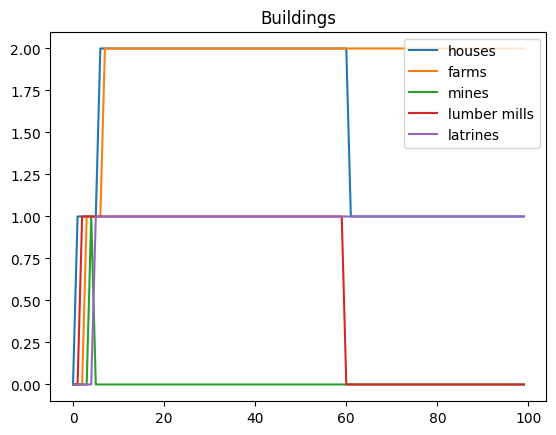

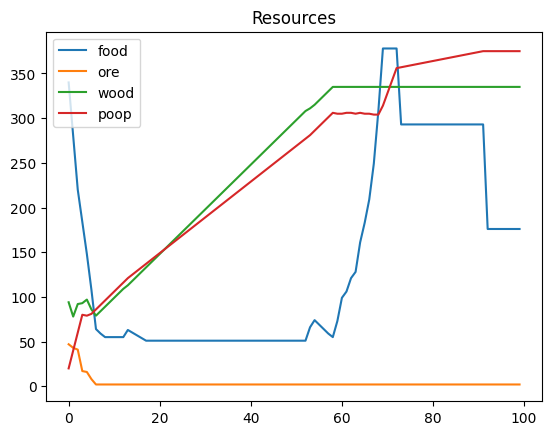

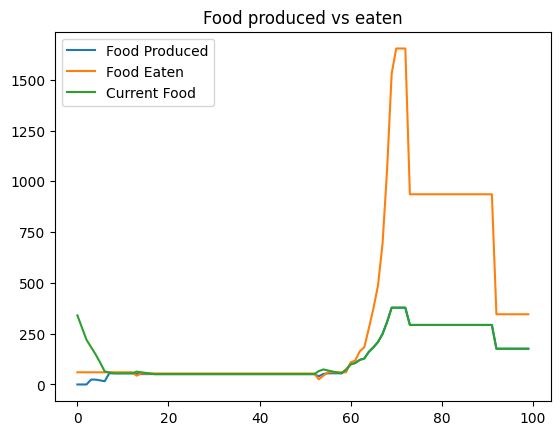

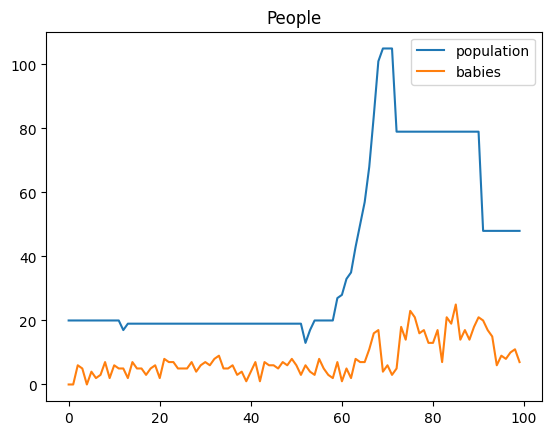


 *** *** *** *** 
 The New Horizon Dawns for the 1th time 
 *** *** *** *** 
 
(100, 100, 3)
memory embed:  tensor([[ 4.9626e-03, -1.3408e-02, -1.1321e-03,  2.3872e-02, -4.2081e-03,
         -2.3437e-02, -3.6052e-02,  4.0426e-02, -3.8851e-02, -4.1029e-02,
         -2.8166e-02, -7.9673e-03, -1.8558e-02,  3.0398e-02,  4.5042e-02,
         -2.1877e-02,  2.2983e-02,  1.4876e-02, -2.0445e-02,  3.4115e-02,
         -4.0267e-02,  2.0986e-03, -2.3417e-02, -2.4705e-02, -1.0377e-02,
         -2.0104e-02, -2.3858e-03, -6.7204e-02, -1.6076e-02, -4.9228e-02,
         -2.0881e-02,  3.9915e-02,  1.0742e-02, -2.3126e-02,  1.2859e-02,
         -2.5985e-04,  1.8419e-02,  4.2995e-03, -1.6126e-02,  1.2189e-02,
         -3.3664e-03,  1.3075e-02, -2.1770e-02,  3.6604e-02,  1.0871e-02,
         -1.5776e-02,  4.0160e-02,  8.0367e-03, -1.3069e-02,  3.8111e-02,
          9.6687e-03, -1.7699e-02, -7.5702e-03, -1.1777e-02, -3.3172e-02,
          5.0355e-02,  1.1423e-02,  1.1137e-03,  1.9133e-02, -4.3995e-03,
   

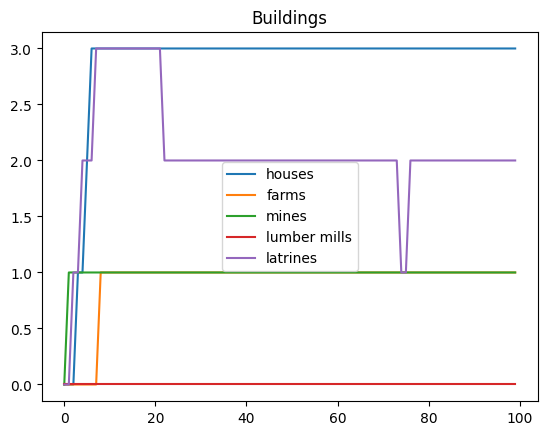

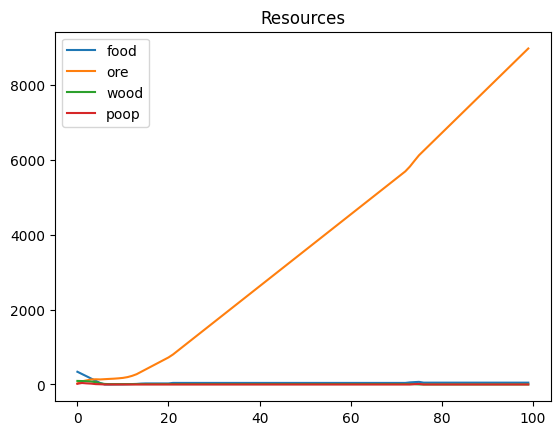

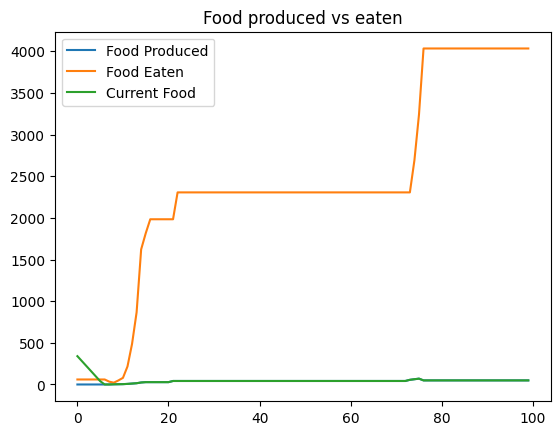

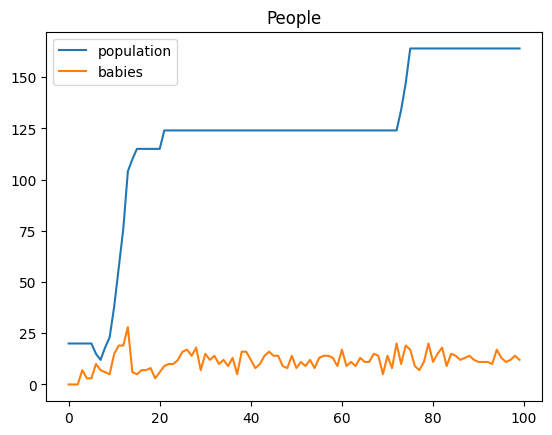


 *** *** *** *** 
 The New Horizon Dawns for the 2th time 
 *** *** *** *** 
 
(100, 100, 3)
memory embed:  tensor([[ 5.2244e-03, -1.3486e-02, -1.0012e-03,  2.4429e-02, -4.1916e-03,
         -2.3221e-02, -3.5867e-02,  4.0262e-02, -3.8905e-02, -4.0993e-02,
         -2.8310e-02, -8.1632e-03, -1.8362e-02,  3.0368e-02,  4.4675e-02,
         -2.2205e-02,  2.2933e-02,  1.5155e-02, -2.0069e-02,  3.4466e-02,
         -4.0100e-02,  2.2427e-03, -2.3731e-02, -2.4315e-02, -1.0347e-02,
         -1.9991e-02, -2.5760e-03, -6.7257e-02, -1.6199e-02, -4.8947e-02,
         -2.0935e-02,  4.0053e-02,  1.0820e-02, -2.3231e-02,  1.2614e-02,
         -1.8896e-04,  1.8210e-02,  3.8750e-03, -1.6259e-02,  1.2480e-02,
         -3.0901e-03,  1.2638e-02, -2.1686e-02,  3.6643e-02,  1.1194e-02,
         -1.5898e-02,  4.0255e-02,  7.7219e-03, -1.3266e-02,  3.8332e-02,
          9.9863e-03, -1.7916e-02, -7.2591e-03, -1.1747e-02, -3.3006e-02,
          5.0364e-02,  1.1805e-02,  1.0897e-03,  1.9174e-02, -4.2330e-03,
   

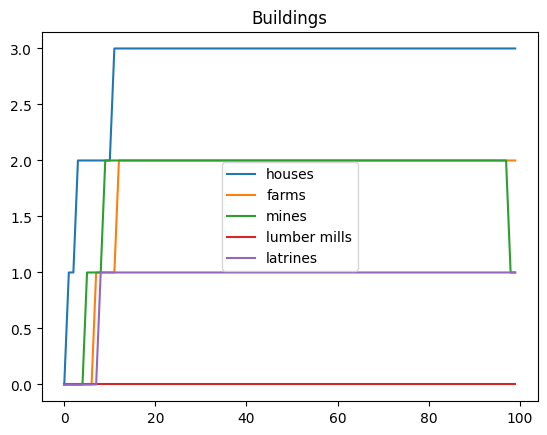

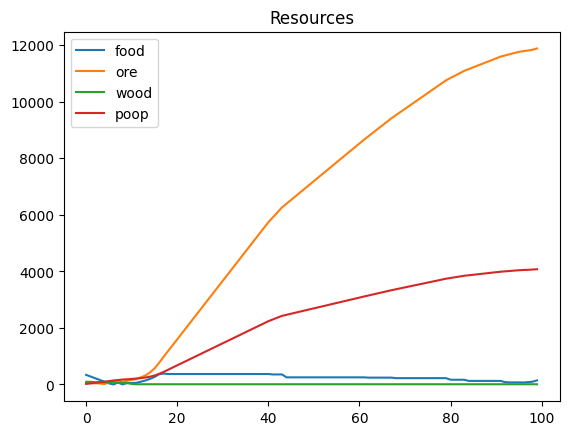

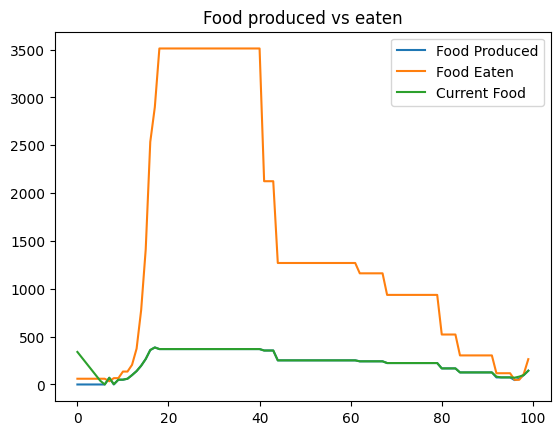

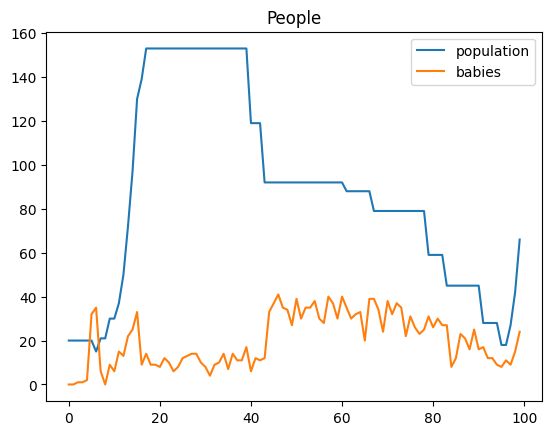


 *** *** *** *** 
 The New Horizon Dawns for the 3th time 
 *** *** *** *** 
 
(100, 100, 3)
memory embed:  tensor([[ 4.9918e-03, -1.3512e-02, -1.1463e-03,  2.4302e-02, -3.7092e-03,
         -2.3222e-02, -3.5648e-02,  4.0102e-02, -3.8419e-02, -4.1173e-02,
         -2.8423e-02, -8.5189e-03, -1.8367e-02,  3.0260e-02,  4.4728e-02,
         -2.2275e-02,  2.2806e-02,  1.5172e-02, -2.0240e-02,  3.4710e-02,
         -3.9991e-02,  2.3322e-03, -2.3965e-02, -2.3759e-02, -1.0036e-02,
         -1.9932e-02, -2.4604e-03, -6.6932e-02, -1.6267e-02, -4.8890e-02,
         -2.1116e-02,  3.9911e-02,  1.0705e-02, -2.3335e-02,  1.2167e-02,
         -4.6351e-04,  1.8430e-02,  3.5995e-03, -1.6509e-02,  1.2708e-02,
         -2.8130e-03,  1.2903e-02, -2.1530e-02,  3.6541e-02,  1.1391e-02,
         -1.6230e-02,  4.0268e-02,  7.7897e-03, -1.3324e-02,  3.8015e-02,
          9.9750e-03, -1.8253e-02, -6.8882e-03, -1.2056e-02, -3.3159e-02,
          5.0610e-02,  1.1227e-02,  1.1208e-03,  1.9652e-02, -4.4403e-03,
   

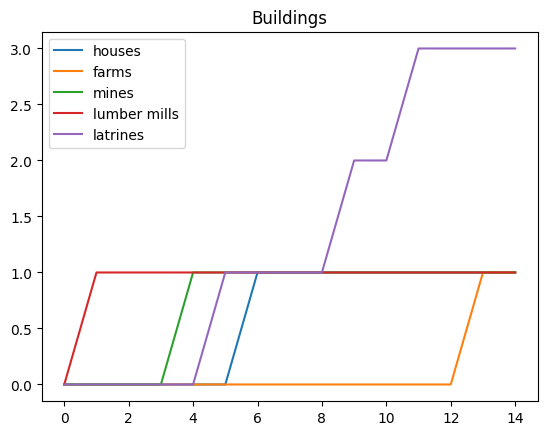

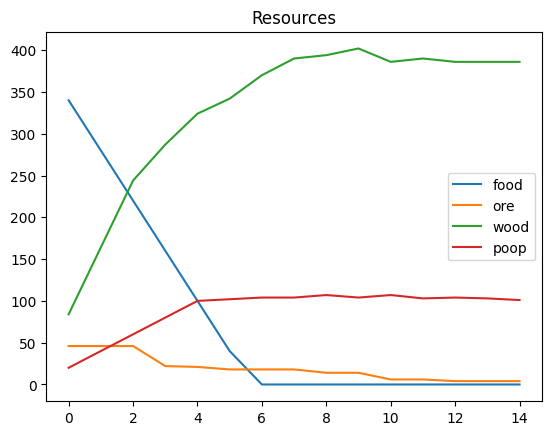

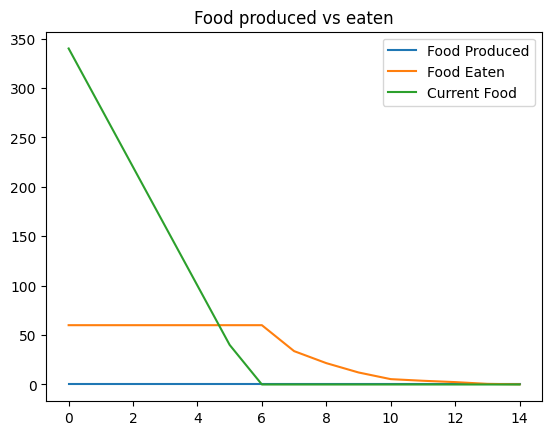

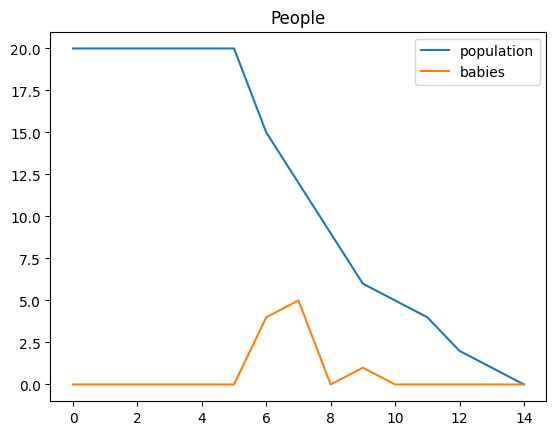


 *** *** *** *** 
 The New Horizon Dawns for the 4th time 
 *** *** *** *** 
 
(100, 100, 3)
memory embed:  tensor([[ 5.0707e-03, -1.3716e-02, -1.4190e-03,  2.4229e-02, -3.5657e-03,
         -2.3104e-02, -3.5602e-02,  4.0136e-02, -3.8361e-02, -4.1192e-02,
         -2.8370e-02, -8.7012e-03, -1.8169e-02,  3.0256e-02,  4.4683e-02,
         -2.2399e-02,  2.2741e-02,  1.5046e-02, -2.0415e-02,  3.4718e-02,
         -3.9964e-02,  2.5389e-03, -2.3841e-02, -2.3605e-02, -1.0137e-02,
         -2.0195e-02, -2.5964e-03, -6.6843e-02, -1.6398e-02, -4.9089e-02,
         -2.1082e-02,  3.9894e-02,  1.0669e-02, -2.3518e-02,  1.2211e-02,
         -6.5254e-04,  1.8487e-02,  3.5110e-03, -1.6772e-02,  1.2743e-02,
         -2.7486e-03,  1.2797e-02, -2.1472e-02,  3.6450e-02,  1.1439e-02,
         -1.6342e-02,  4.0159e-02,  7.8183e-03, -1.3215e-02,  3.8037e-02,
          9.8837e-03, -1.8394e-02, -6.8007e-03, -1.1792e-02, -3.3233e-02,
          5.0612e-02,  1.1061e-02,  1.0782e-03,  1.9878e-02, -4.2974e-03,
   

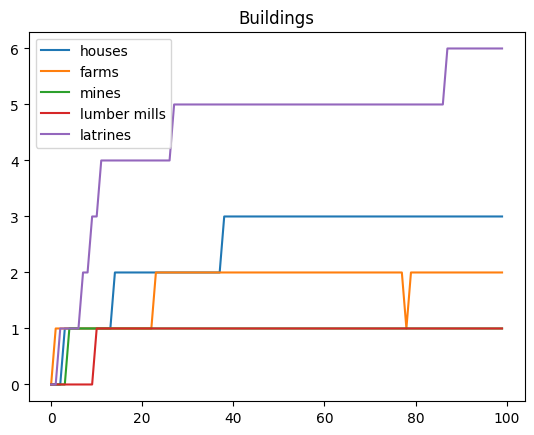

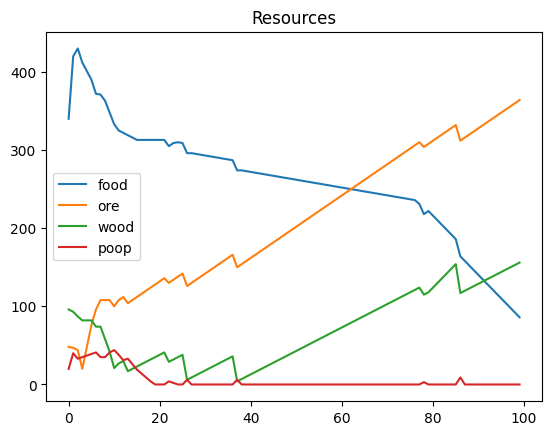

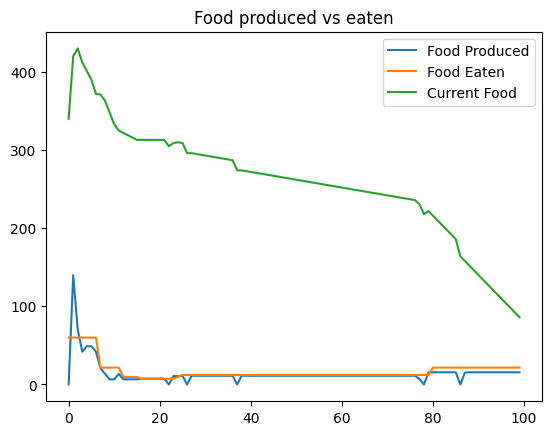

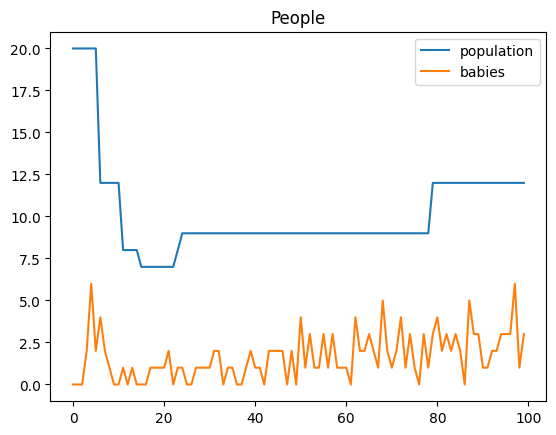

In [6]:
from IPython.display import clear_output
# fun(episodes, epochs, N,reward_type)
N = 5

scale = 0.5

width = 1000
height = 1100
window_width = width * scale
window_height = height * scale
pygame.init()
DISP = pygame.display.set_mode((window_width, window_height))
game_surface = pygame.Surface((width, height-100))
info_surface = pygame.Surface((width, 100))

font = pygame.font.Font(None, 36)  # None = default font, 36 = size


land_tensors = None


years = 5
steps = 100

for i in range(years):


  print(f'\n *** *** *** *** \n The New Horizon Dawns for the {i}th time \n *** *** *** *** \n ')



  land_tensors, resource_tensors = env.reset()

  #council_decision = [1,0,5]

  reward = None

  for i in range(steps):
    clock.tick(FPS)
    game_surface.fill((0,0,0))
    info_surface.fill((0,0,0))
    Render(reward)

    if env.end == True:
      break

    env.print=True
    if reward_type != 0:
      council_decision, prob, critic_val = the_council.choose_action(land_tensors, resource_tensors)
    else:
      council_decision = random.randint(0,500)

    council_plans = convert_index(council_decision)
    land_tensors_, resource_tensors_ = env.step(council_plans) #reward

    reward = reward_type * env.reward
    if reward_type != 0:
      #score += reward # plot reward as we go
      the_council.remember([land_tensors, resource_tensors], council_decision, prob, critic_val, reward, env.end)

      if i % N == 0:
                the_council.learn()
                #learn_iters += 1

    land_tensors, resource_tensors = land_tensors_, resource_tensors_




  ### Save

  the_council.save_models()

  the_council.reset_memory()  ## For LSTM


  def graph_metrics(title, labels, *metrics):


        for idx, metric in enumerate(metrics):
          plt.plot(metric, label = labels[idx])
        plt.title(title)
        plt.legend()
        plt.show()


  graph_metrics('Buildings', [ 'houses', 'farms', 'mines', 'lumber mills', 'latrines'], env.houses_list, env.farms_list, env.mines_list, env.lumber_mills_list, env.latrines_list)

  graph_metrics('Resources', ['food', 'ore', 'wood','poop'], env.food_list, env.ore_list, env.wood_list, env.poop_list)

  graph_metrics('Food produced vs eaten', ['Food Produced', 'Food Eaten', 'Current Food'], env.food_produced_list, env.food_eaten_list, env.food_list)

  graph_metrics('People', ['population', 'babies'], env.people_list, env.baby_list)





In [7]:
print(os.listdir())

['Council.py', '__pycache__', '.ipynb_checkpoints', 'Environment.py', 'Safety', 'NBHDWatch_MAIN.ipynb', 'Assets', 'Models']
